# Normalizacja

Na tych zajęciach użyjemy zbioru danych dotyczących sprzedaży nieruchomości.

Link do zbioru danych: https://www.kaggle.com/datasets/mohammedaltet/egypt-houses-price

Kolumny w zbiorze:
- Type: the type of property
- Price: the price of property
- Bedrooms: number of bedrooms
- Bathrooms: number of bathrooms
- Area: the Area of the property by m^2
- Furnished: is the property Furnished or not
- Level: In what floor the property is ?
- Compound: ** In what Compound the property is ?**
- Payment_Option
- Delivery_Date
- City

In [1]:
# Pobranie bibliotek
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler,RobustScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
# Pobranie danych
df = pd.read_csv("data/egypt_houses_price_cleaned.csv")
del df['Unnamed: 0']

In [59]:
# Wykluczenie zmiennych nieliczbowych
df = df.select_dtypes(exclude='object')

In [60]:
# train test split

train, test, _,_ = train_test_split(df,df['Price'], test_size=0.2, random_state=123)

In [61]:
# Standard scaler
std_sc = StandardScaler().fit(train)

In [62]:
# wartości średnie
std_sc.mean_

array([1.36625521e+04, 4.76380485e+06, 3.23599927e+00, 2.81295754e+00,
       2.27456973e+02])

In [63]:
# nazwy zmiennych
std_sc.feature_names_in_

array(['index', 'Price', 'Bedrooms', 'Bathrooms', 'Area'], dtype=object)

In [64]:
std_sc.transform(train)

array([[-1.57283576,  0.13597303, -0.19468408,  0.13786154, -0.11608054],
       [-1.56725947, -0.66575204, -1.01961917, -1.33625875, -1.00286494],
       [ 1.32607195,  1.03700307, -0.19468408,  0.13786154,  0.14177875],
       ...,
       [ 0.51789085, -0.60475122, -1.84455425, -1.33625875, -1.12864996],
       [ 0.26378969, -0.13707826, -1.01961917, -0.5991986 , -0.89594767],
       [ 0.80215465,  1.60289751,  1.4551861 ,  1.61198183,  2.51911565]])

In [65]:
price_new_train = std_sc.transform(train)[:,1]

In [66]:
price_new_test = std_sc.transform(test)[:,1]

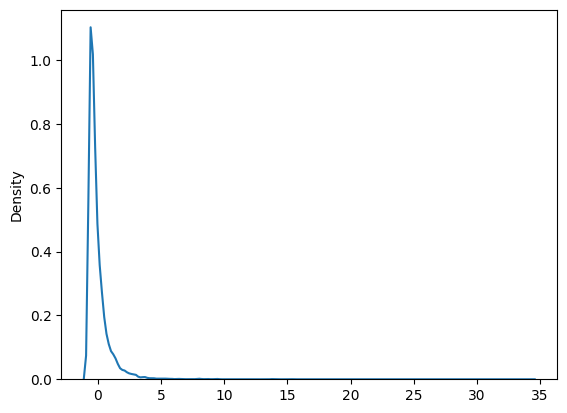

In [67]:
# wykres gestosci transformacji ceny
sns.kdeplot(price_new_train)
plt.show()

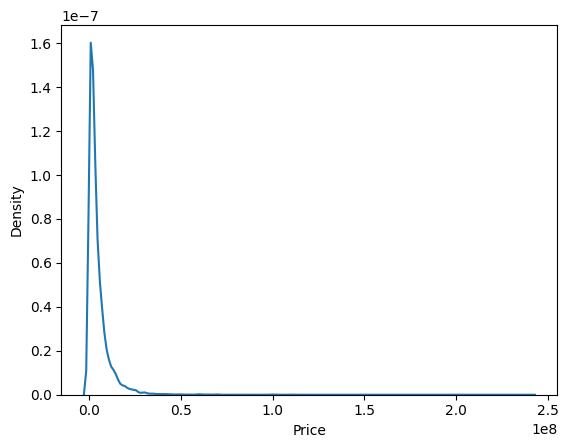

In [68]:
# wykres gęstości ceny
sns.kdeplot(train['Price'])
plt.show()

In [69]:
pd.Series(price_new_train).describe()

count    2.185600e+04
mean    -4.811508e-17
std      1.000023e+00
min     -6.875380e-01
25%     -5.264199e-01
50%     -2.997471e-01
75%      1.722830e-01
max      3.416572e+01
dtype: float64

In [70]:
pd.Series(price_new_test).describe()

count    5465.000000
mean       -0.001366
std         0.910778
min        -0.683399
25%        -0.521529
50%        -0.285223
75%         0.179545
max        13.832110
dtype: float64

In [71]:
# Transformacja bez tworzenia obiektu
scale(df)

array([[-1.732089  , -0.11260009, -0.19878706,  0.13907066,  1.07411838],
       [-1.73196238, -0.11260009, -0.19878706,  0.13907066, -0.42777548],
       [-1.73183576, -0.3712221 , -0.19878706, -0.60187114, -0.39648603],
       ...,
       [ 1.73196083,  1.33568314, -0.19878706,  0.88001246,  0.4983924 ],
       [ 1.73208745,  4.46870402,  0.6294974 ,  0.88001246,  1.56223388],
       [ 1.73221407,  0.00562711,  1.45778186,  1.62095427, -0.33390712]])

## Min max scaler


In [72]:
# min max scaler
min_max_scaler = MinMaxScaler().fit_transform(train)

In [ ]:
# describe
pd.Series(min_max_scaler[:,1]).describe()

count    21856.000000
mean         0.019727
std          0.028692
min          0.000000
25%          0.004623
50%          0.011126
75%          0.024670
max          1.000000
dtype: float64

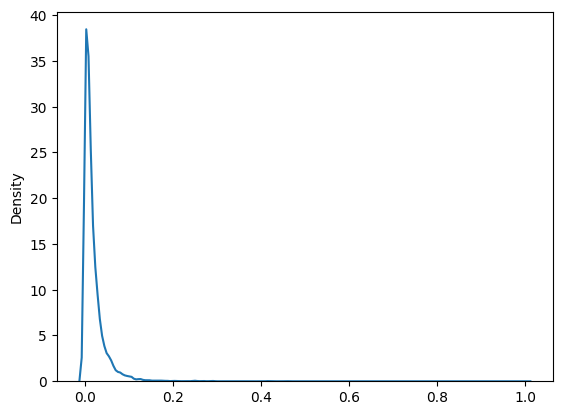

In [75]:
# wykres gestosci
sns.kdeplot(min_max_scaler[:,1])
plt.show()

## Max Abs scaler

In [76]:
# fit_tranform
max_abs_sc = MaxAbsScaler().fit_transform(train)

In [77]:
# describe
pd.Series(max_abs_sc[:,1]).describe()

count    21856.000000
mean         0.019849
std          0.028689
min          0.000125
25%          0.004747
50%          0.011250
75%          0.024792
max          1.000000
dtype: float64

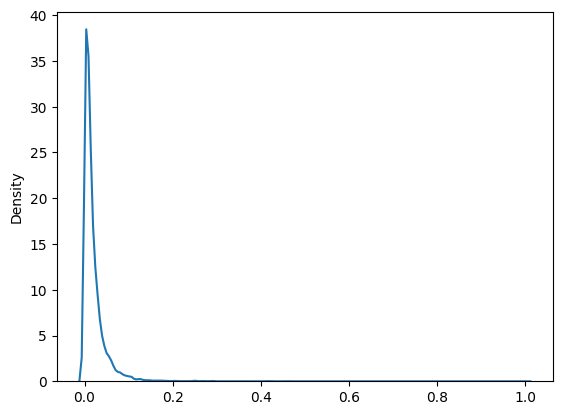

In [78]:
# Wykes gęstości
sns.kdeplot(max_abs_sc[:,1])
plt.show()

## Robust scaler

In [79]:
#fit_transform
robust_sc = RobustScaler().fit_transform(train)

In [80]:
# describe
pd.Series(robust_sc[:,1]).describe()

count    21856.000000
mean         0.429005
std          1.431256
min         -0.555015
25%         -0.324419
50%          0.000000
75%          0.675581
max         49.327779
dtype: float64

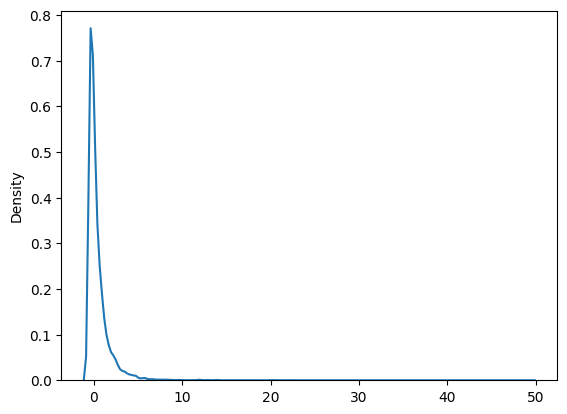

In [82]:
# wykres gęstości
sns.kdeplot(robust_sc[:,1])
plt.show()